In [40]:
import seaborn as sns
%matplotlib inline

In [41]:
sns.set(style="darkgrid")

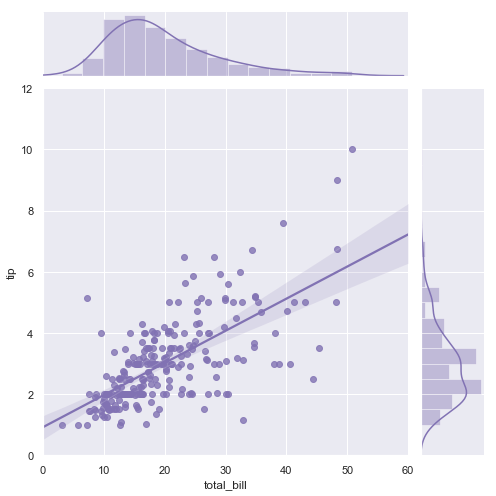

In [42]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)